In [1]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.7/884.7 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40


# FFT Model

# Dự đoán giá vàng

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from darts import TimeSeries
from darts.models import FFT
from darts.metrics import mae, mape, rmse, r2_score

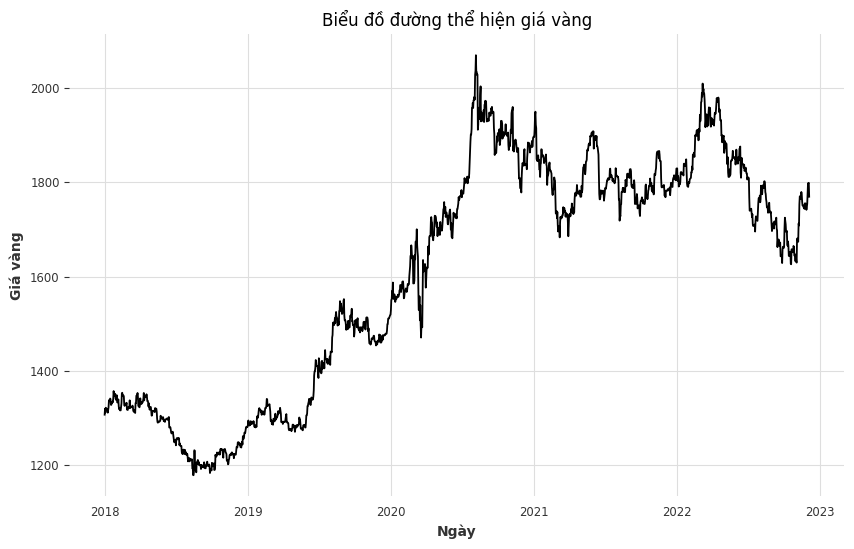

In [30]:
df_gold = pd.read_csv('gold_price_2018_2024.csv')
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold.columns = ['Date', 'Price']

train_data_gold = df_gold.iloc[:1800]
test_data_gold = df_gold.iloc[1800:]

plt.figure(figsize=(10, 6))
plt.plot(train_data_gold['Date'], train_data_gold['Price'])
plt.title('Biểu đồ đường thể hiện giá vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng')
plt.show()

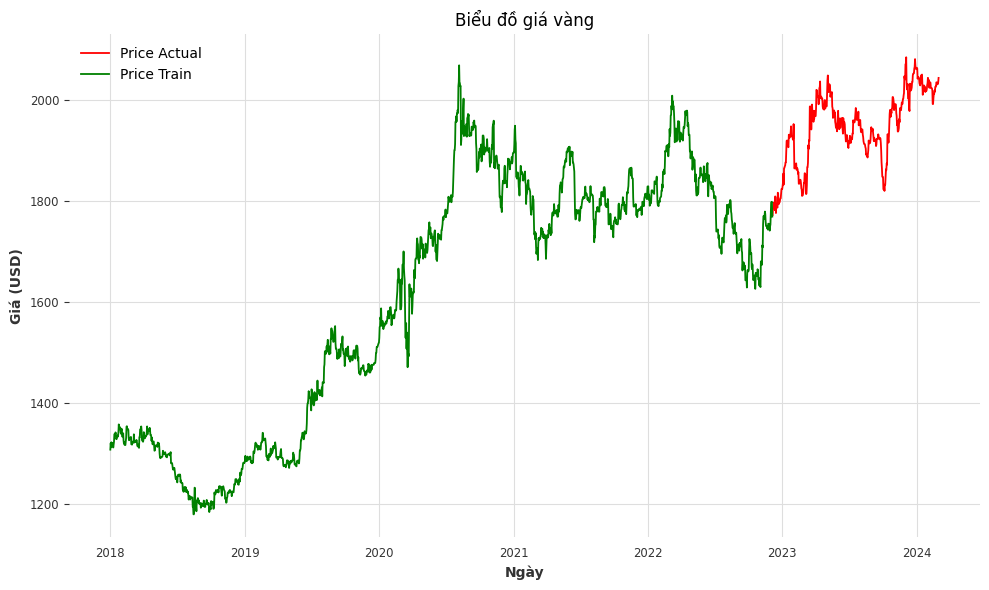

In [31]:
plt.figure(figsize=(10, 6))

# plt.plot(test_data_gold['Day Number'], test_data_gold['Price Predict'], label='Price Predict', color='blue')
plt.plot(test_data_gold['Date'], test_data_gold['Price'], label='Price Actual', color='red')
plt.plot(train_data_gold['Date'], train_data_gold['Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_gold = TimeSeries.from_dataframe(train_data_gold, time_col='Date')
test_ts_gold = TimeSeries.from_dataframe(test_data_gold, time_col='Date')

In [33]:
model = FFT(
    nr_freqs_to_keep=len(test_ts_gold),
    trend= "poly",
    trend_poly_degree=1
)
model.fit(train_ts_gold)
pred_gold = model.predict(len(test_ts_gold))

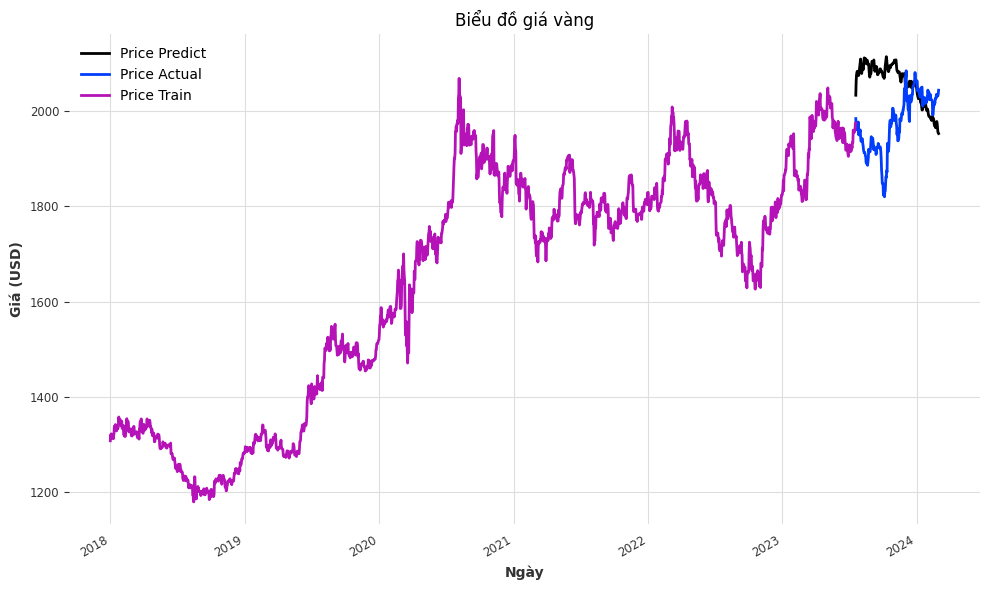

MAE: 102.77755538968326
MAPE: 4.940313249392472
RMSE: 125.82601202414156


In [51]:
plt.figure(figsize=(10, 6))

pred_gold.plot(label='Price Predict')
test_ts_gold.plot(label='Price Actual')
train_ts_gold.plot(label='Price Train')


plt.title('Biểu đồ giá Vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_gold, test_ts_gold))
print("MAPE:", mape(pred_gold, test_ts_gold))
print("RMSE:", rmse(pred_gold, test_ts_gold))


Chia theo tỷ lệ 7:3


In [35]:
train_data_gold = df_gold.iloc[:1576]
test_data_gold = df_gold.iloc[1576:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_gold = TimeSeries.from_dataframe(train_data_gold, time_col='Date')
test_ts_gold = TimeSeries.from_dataframe(test_data_gold, time_col='Date')

# Train model
model.fit(train_ts_gold)
pred_gold = model.predict(len(test_ts_gold))


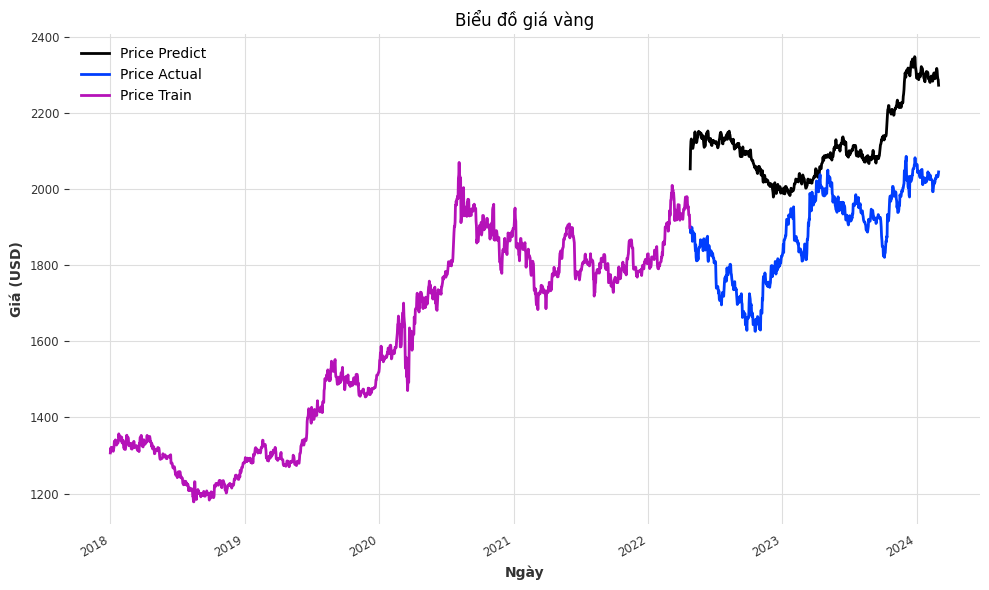

MAE: 233.87819087592183
MAPE: 10.987860894641042
RMSE: 256.60552463772933


In [36]:
plt.figure(figsize=(10, 6))

pred_gold.plot(label='Price Predict')
test_ts_gold.plot(label='Price Actual')
train_ts_gold.plot(label='Price Train')


plt.title('Biểu đồ giá Vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_gold, test_ts_gold))
print("MAPE:", mape(pred_gold, test_ts_gold))
print("RMSE:", rmse(pred_gold, test_ts_gold))

Chia theo tỷ lệ 9:1

In [37]:
train_data_gold = df_gold.iloc[:2026]
test_data_gold = df_gold.iloc[2026:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_gold = TimeSeries.from_dataframe(train_data_gold, time_col='Date')
test_ts_gold = TimeSeries.from_dataframe(test_data_gold, time_col='Date')

# Train model

model.fit(train_ts_gold)
pred_gold = model.predict(len(test_ts_gold))

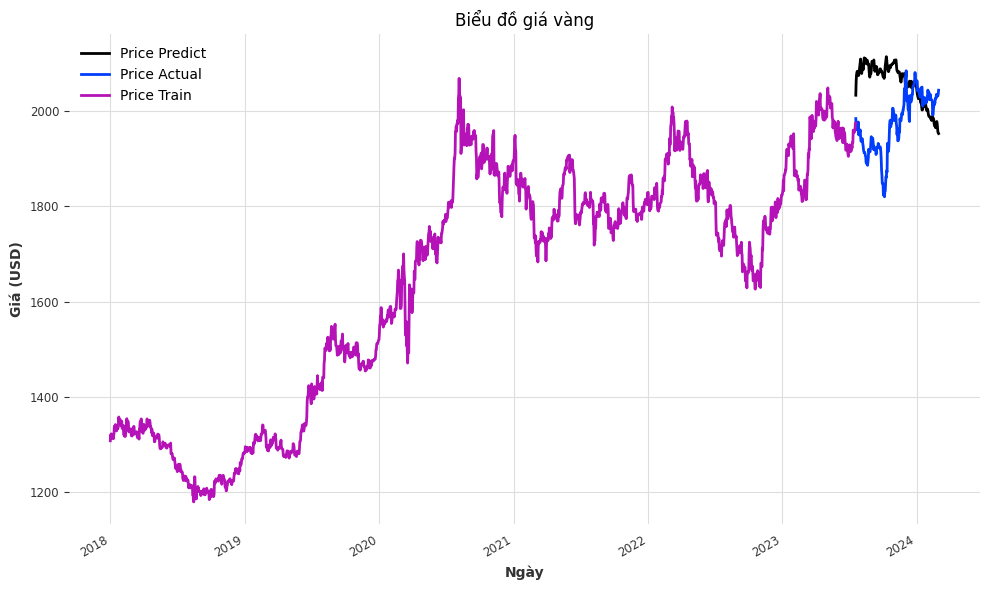

MAE: 102.77755538968326
MAPE: 4.940313249392472
RMSE: 125.82601202414156


In [38]:
plt.figure(figsize=(10, 6))

pred_gold.plot(label='Price Predict')
test_ts_gold.plot(label='Price Actual')
train_ts_gold.plot(label='Price Train')


plt.title('Biểu đồ giá Vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_gold, test_ts_gold))
print("MAPE:", mape(pred_gold, test_ts_gold))
print("RMSE:", rmse(pred_gold, test_ts_gold))

# Dự đoán giá Platium

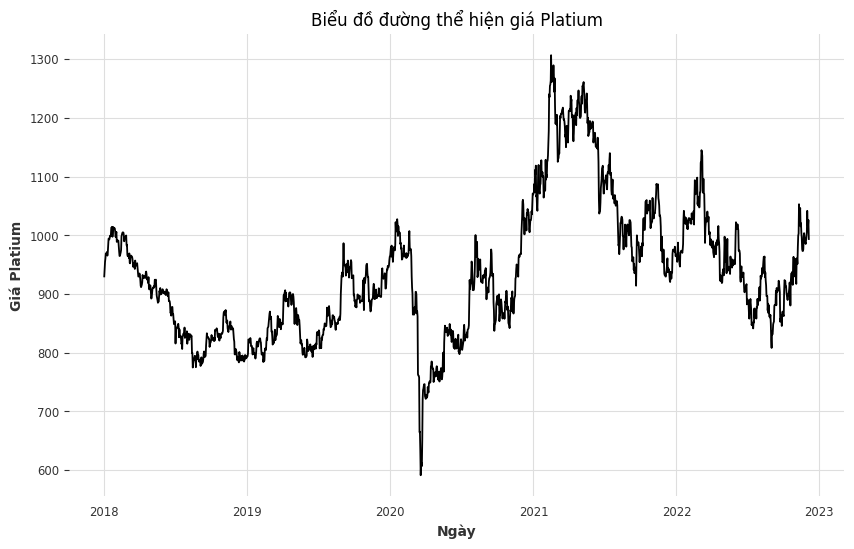

In [39]:
df_platium = pd.read_csv('platium_price_2018_2024.csv')
df_platium['Date'] = pd.to_datetime(df_platium['Date'])

df_platium.columns = ['Date', 'Price']

train_data_platium = df_platium.iloc[:1800]
test_data_platium = df_platium.iloc[1800:]

plt.figure(figsize=(10, 6))
plt.plot(train_data_platium['Date'], train_data_platium['Price'])
plt.title('Biểu đồ đường thể hiện giá Platium')
plt.xlabel('Ngày')
plt.ylabel('Giá Platium')
plt.show()

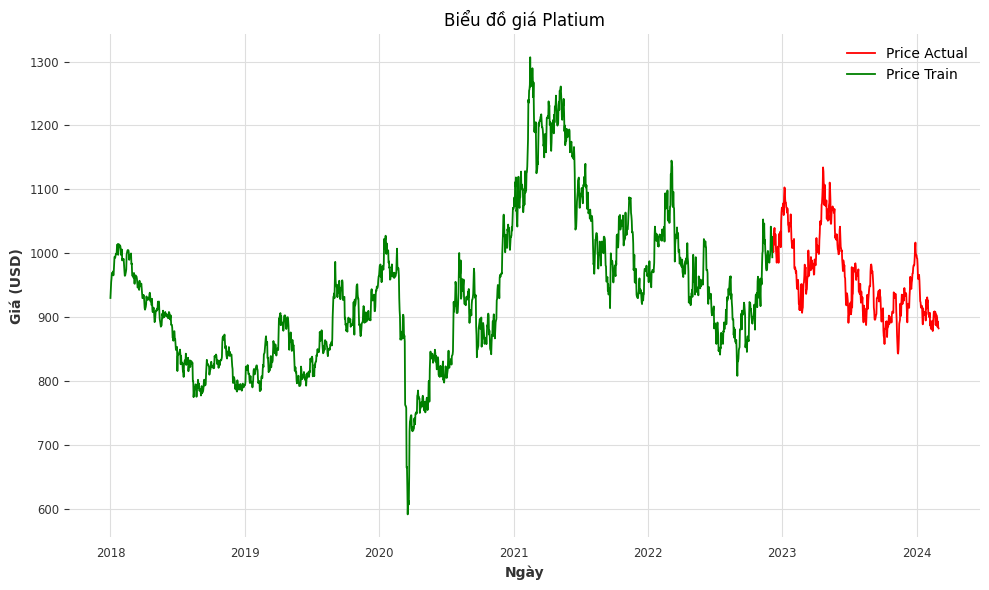

In [40]:
plt.figure(figsize=(10, 6))

plt.plot(test_data_platium['Date'], test_data_platium['Price'], label='Price Actual', color='red')
plt.plot(train_data_platium['Date'], train_data_platium['Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá Platium')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

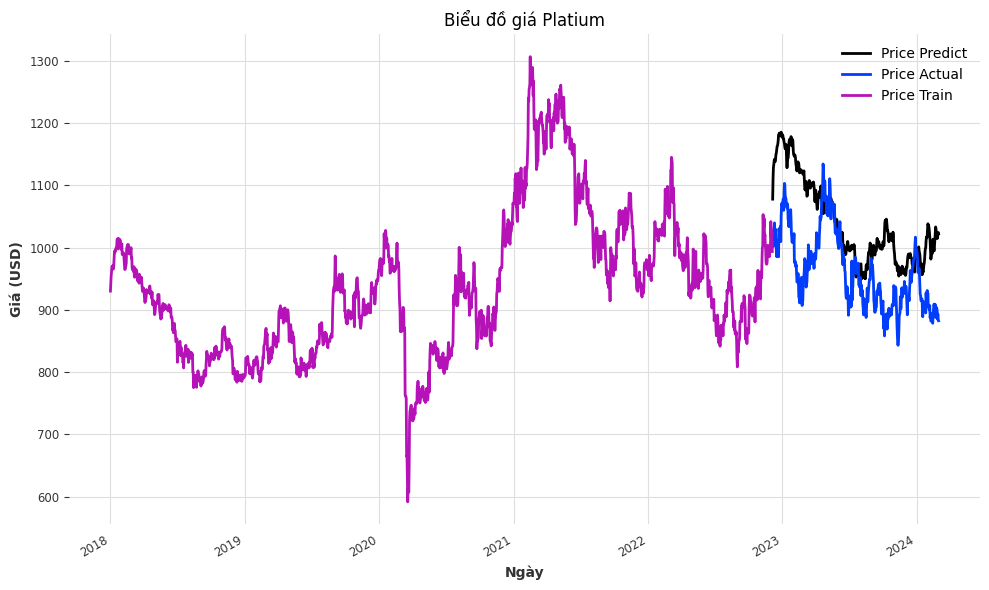

MAE: 79.22831312260446
MAPE: 7.472840679706678
RMSE: 95.2312339923047


In [41]:
# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_platium = TimeSeries.from_dataframe(train_data_platium, time_col='Date')
test_ts_platium = TimeSeries.from_dataframe(test_data_platium, time_col='Date')

model = FFT(
    nr_freqs_to_keep=len(test_ts_platium),
    trend= "poly",
    trend_poly_degree=1
)
model.fit(train_ts_platium)
pred_platium = model.predict(len(test_ts_platium))

plt.figure(figsize=(10, 6))


pred_platium.plot(label='Price Predict')
test_ts_platium.plot(label='Price Actual')
train_ts_platium.plot(label='Price Train')

plt.title('Biểu đồ giá Platium')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_platium, test_ts_platium))
print("MAPE:", mape(pred_platium, test_ts_platium))
print("RMSE:", rmse(test_ts_platium, pred_platium))


Chia theo tỷ lệ 7:3


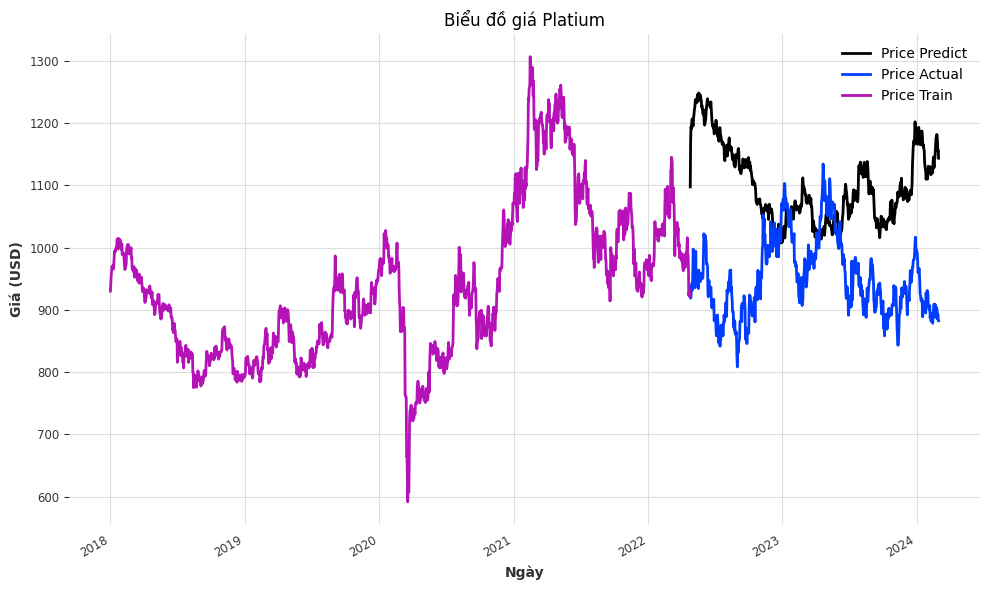

MAE: 156.85828922056254
MAPE: 13.899572207111568
RMSE: 181.89729315726672


In [52]:
train_data_platium = df_platium.iloc[:1576]
test_data_platium = df_platium.iloc[1576:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_platium = TimeSeries.from_dataframe(train_data_platium, time_col='Date')
test_ts_platium = TimeSeries.from_dataframe(test_data_platium, time_col='Date')

# Train model

model.fit(train_ts_platium)
pred_platium = model.predict(len(test_ts_platium))

plt.figure(figsize=(10, 6))

pred_platium.plot(label='Price Predict')
test_ts_platium.plot(label='Price Actual')
train_ts_platium.plot(label='Price Train')


plt.title('Biểu đồ giá Platium')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_platium, test_ts_platium))
print("MAPE:", mape(pred_platium, test_ts_platium))
print("RMSE:", rmse(pred_platium, test_ts_platium))

Chia theo tỷ lệ 9:1

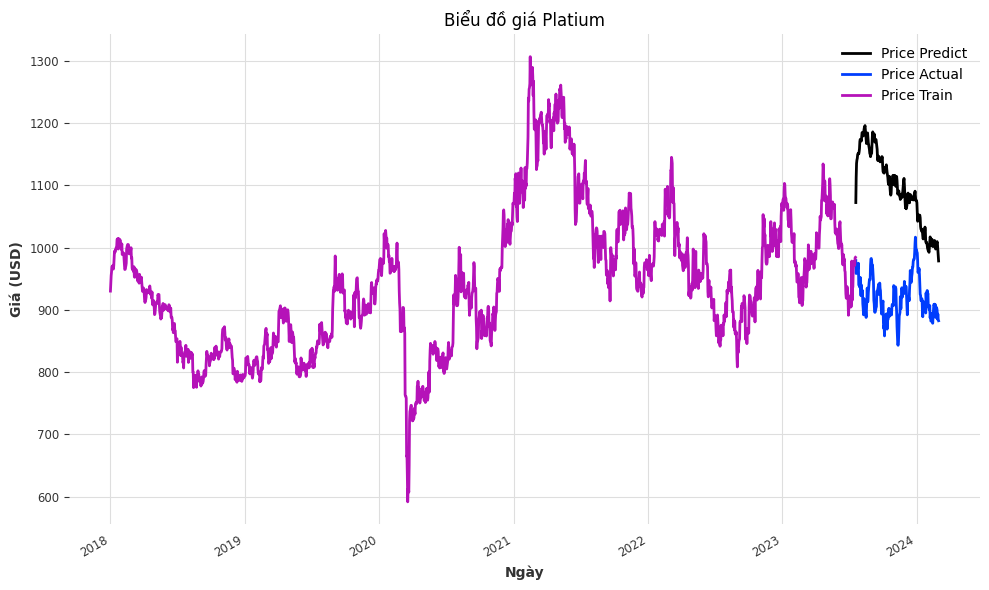

MAE: 174.19143420926403
MAPE: 15.679136040425922
RMSE: 185.0014231745425


In [53]:
train_data_platium = df_platium.iloc[:2026]
test_data_platium = df_platium.iloc[2026:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_platium = TimeSeries.from_dataframe(train_data_platium, time_col='Date')
test_ts_platium = TimeSeries.from_dataframe(test_data_platium, time_col='Date')

# Train model

model.fit(train_ts_platium)
pred_platium = model.predict(len(test_ts_platium))

plt.figure(figsize=(10, 6))

pred_platium.plot(label='Price Predict')
test_ts_platium.plot(label='Price Actual')
train_ts_platium.plot(label='Price Train')


plt.title('Biểu đồ giá Platium')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_platium, test_ts_platium))
print("MAPE:", mape(pred_platium, test_ts_platium))
print("RMSE:", rmse(pred_platium, test_ts_platium))

# Dự đoán giá bạc

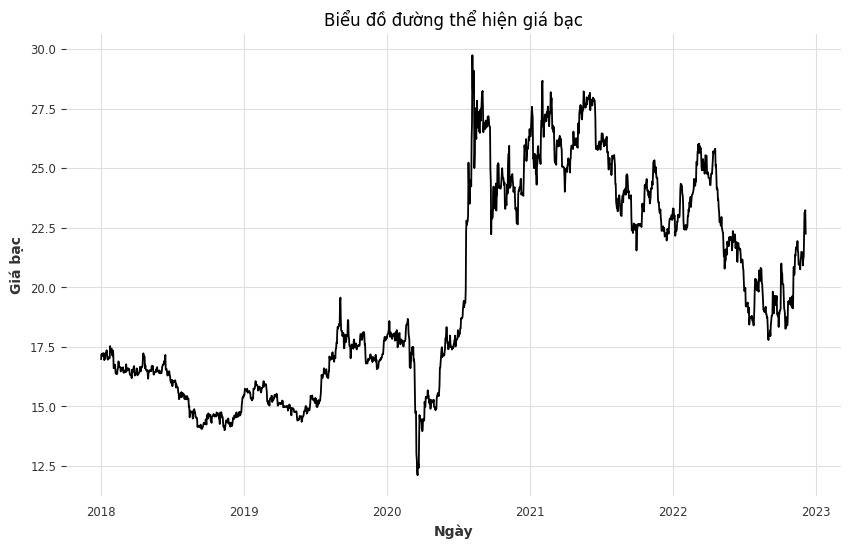

In [44]:
df_silver = pd.read_csv('silver_price_2018_2024.csv')
df_silver['Date'] = pd.to_datetime(df_silver['Date'])

df_silver.columns = ['Date', 'Price']

train_data_silver = df_silver.iloc[:1800]
test_data_silver = df_silver.iloc[1800:]

plt.figure(figsize=(10, 6))
plt.plot(train_data_silver['Date'], train_data_silver['Price'])
plt.title('Biểu đồ đường thể hiện giá bạc')
plt.xlabel('Ngày')
plt.ylabel('Giá bạc')
plt.show()

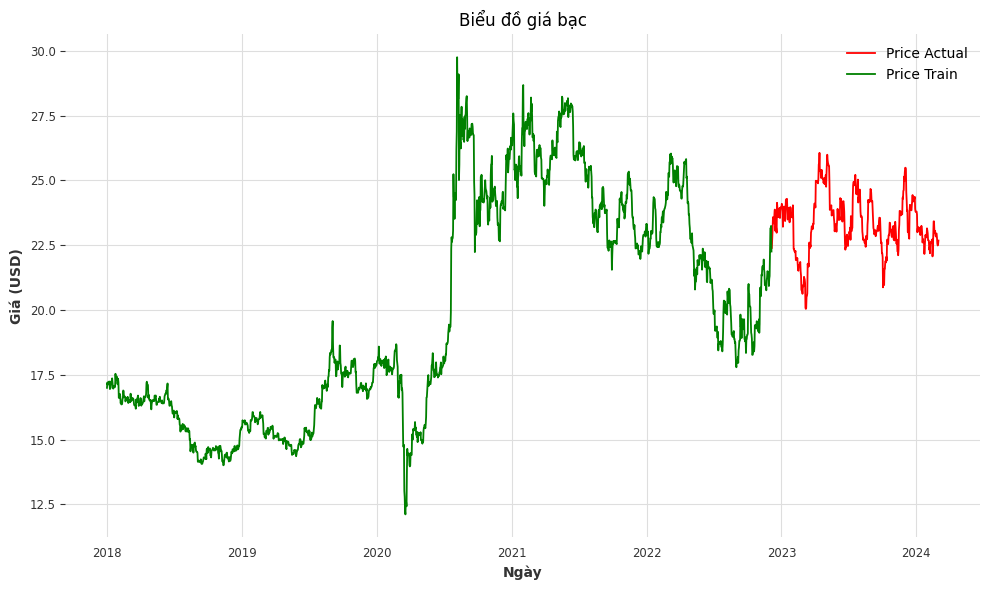

In [45]:
plt.figure(figsize=(10, 6))

plt.plot(test_data_silver['Date'], test_data_silver['Price'], label='Price Actual', color='red')
plt.plot(train_data_silver['Date'], train_data_silver['Price'], label='Price Train', color='green')

plt.title('Biểu đồ giá bạc')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

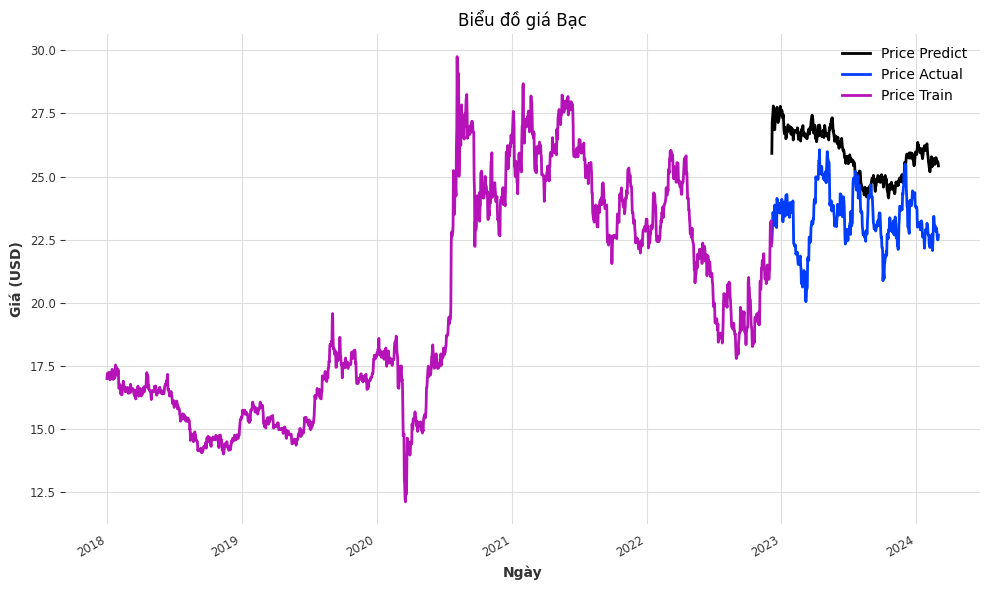

MAE: 2.5671078754904504
MAPE: 9.804446875813516
RMSE: 2.903736112334913
R-Square: -6.1459424294581275


In [46]:
# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_silver = TimeSeries.from_dataframe(train_data_silver, time_col='Date')
test_ts_silver = TimeSeries.from_dataframe(test_data_silver, time_col='Date')

model = FFT(
    nr_freqs_to_keep=len(test_ts_silver),
    trend= "poly",
    trend_poly_degree=1
)
model.fit(train_ts_silver)
pred_silver = model.predict(len(test_ts_silver))

plt.figure(figsize=(10, 6))


pred_silver.plot(label='Price Predict')
test_ts_silver.plot(label='Price Actual')
train_ts_silver.plot(label='Price Train')

plt.title('Biểu đồ giá Bạc')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_silver, test_ts_silver))
print("MAPE:", mape(pred_silver, test_ts_silver))

Chia theo tỷ lệ 7:3

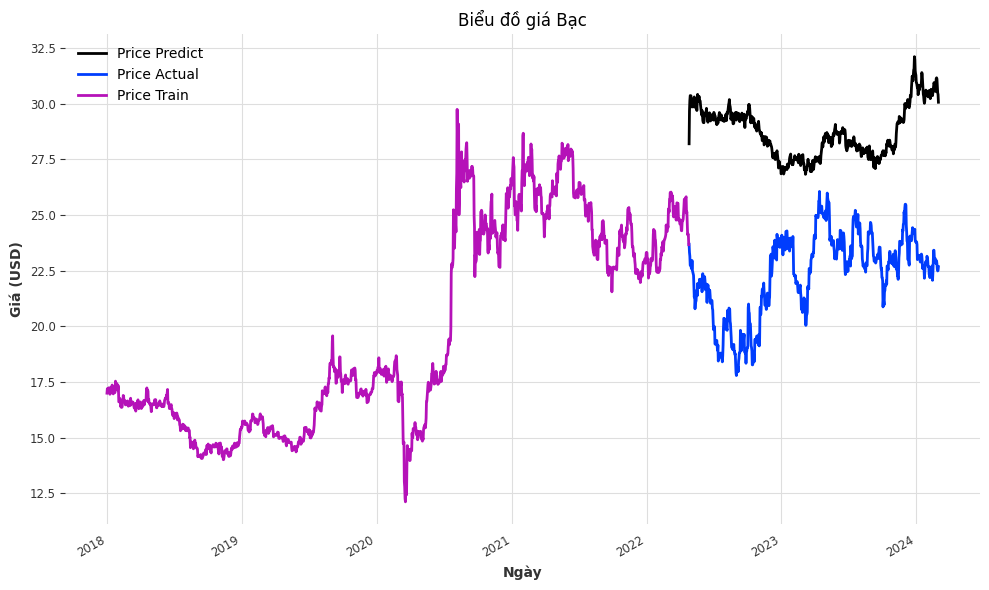

MAE: 6.392938147828322
MAPE: 22.059911791983534
RMSE: 6.824206890515347


In [50]:
train_data_silver = df_silver.iloc[:1576]
test_data_silver = df_silver.iloc[1576:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_silver = TimeSeries.from_dataframe(train_data_silver, time_col='Date')
test_ts_silver = TimeSeries.from_dataframe(test_data_silver, time_col='Date')

# Train model

model.fit(train_ts_silver)
pred_silver = model.predict(len(test_ts_silver))

plt.figure(figsize=(10, 6))

pred_silver.plot(label='Price Predict')
test_ts_silver.plot(label='Price Actual')
train_ts_silver.plot(label='Price Train')


plt.title('Biểu đồ giá Bạc')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_silver, test_ts_silver))
print("MAPE:", mape(pred_silver, test_ts_silver))
print("RMSE:", rmse(pred_silver, test_ts_silver))

Chia theo tỷ lệ 9:1

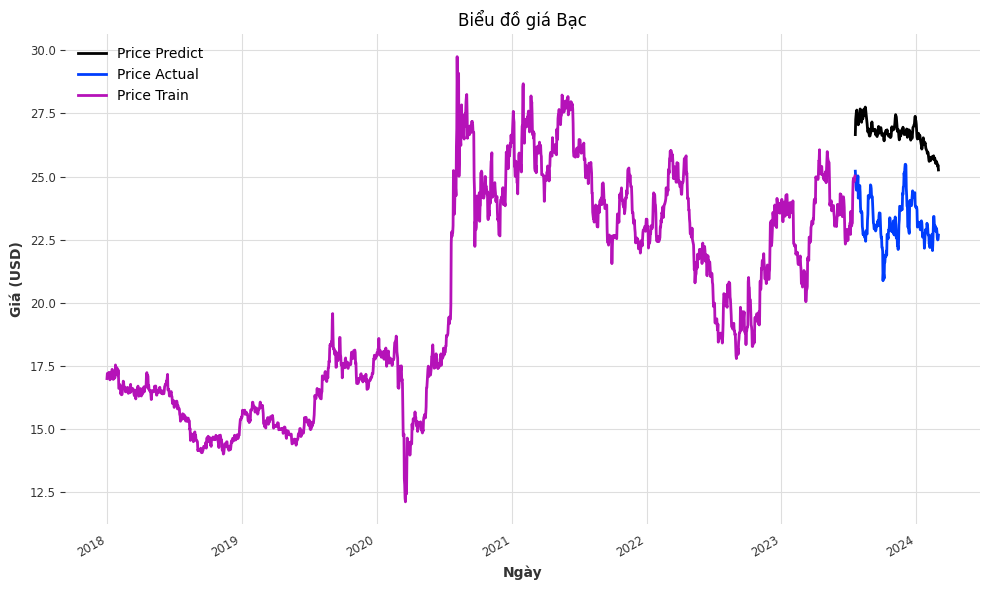

MAE: 3.417595319166928
MAPE: 12.798112765615048
RMSE: 3.5200923873761463


In [49]:
train_data_silver = df_silver.iloc[:2026]
test_data_silver = df_silver.iloc[2026:]

# Chuyển tập train và test từ DataFrame sang dạng TimeSeries để làm việc với thư viện Darts
train_ts_silver = TimeSeries.from_dataframe(train_data_silver, time_col='Date')
test_ts_silver = TimeSeries.from_dataframe(test_data_silver, time_col='Date')

# Train model

model.fit(train_ts_silver)
pred_silver = model.predict(len(test_ts_silver))

plt.figure(figsize=(10, 6))

pred_silver.plot(label='Price Predict')
test_ts_silver.plot(label='Price Actual')
train_ts_silver.plot(label='Price Train')


plt.title('Biểu đồ giá Bạc')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.legend()
plt.tight_layout()
plt.show()

print("MAE:", mae(pred_silver, test_ts_silver))
print("MAPE:", mape(pred_silver, test_ts_silver))
print("RMSE:", rmse(pred_silver, test_ts_silver))